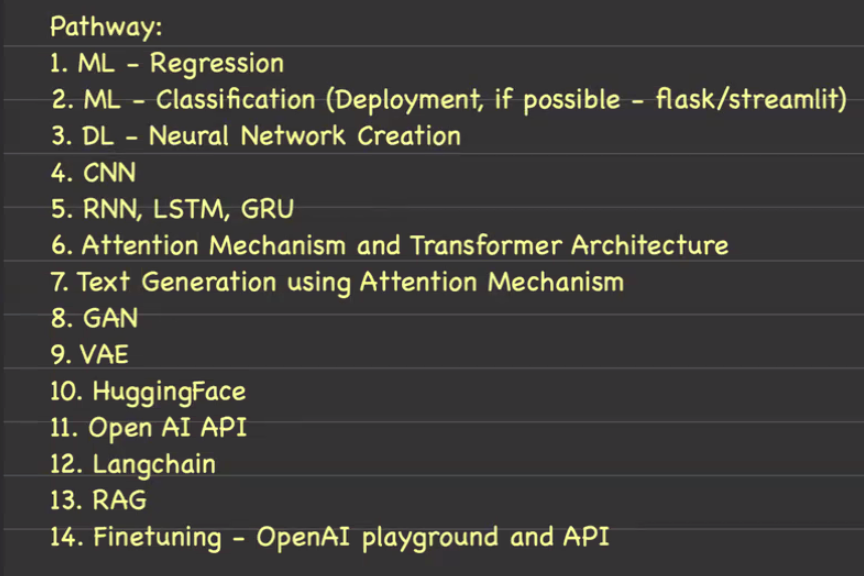

In [58]:
# Classification Algorithms in Machine Learning
# The goal is to predict the survival of passengers on the Titanic based on the features provided in the dataset.

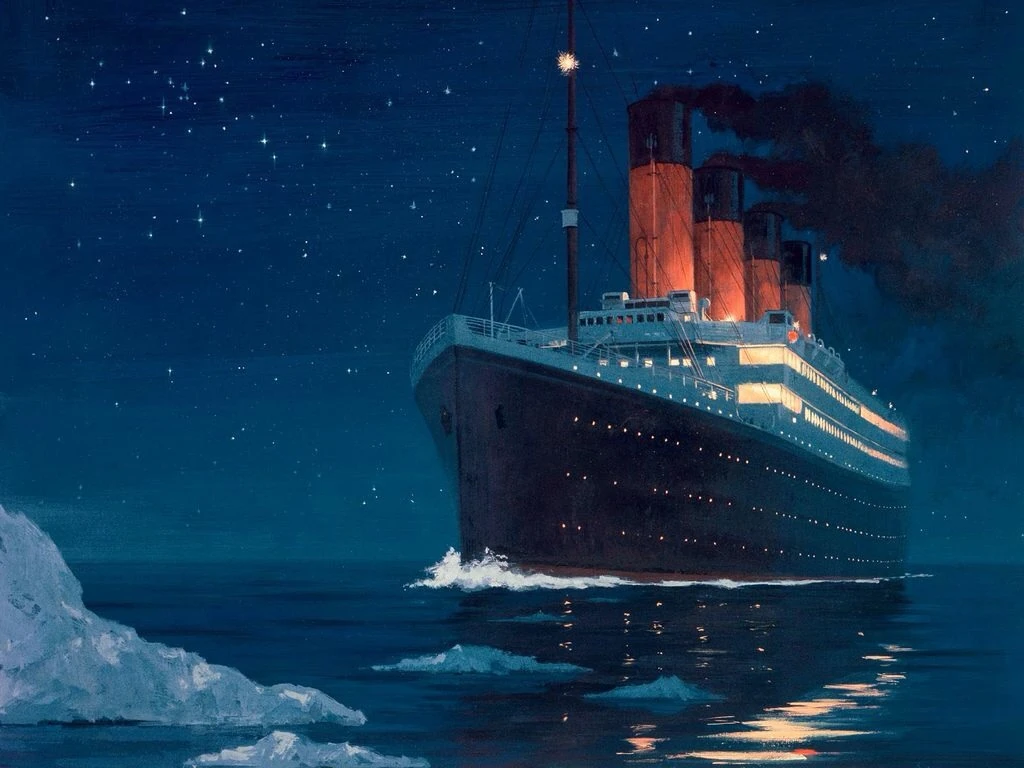

In [59]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
# Load the dataset
df = pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [61]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

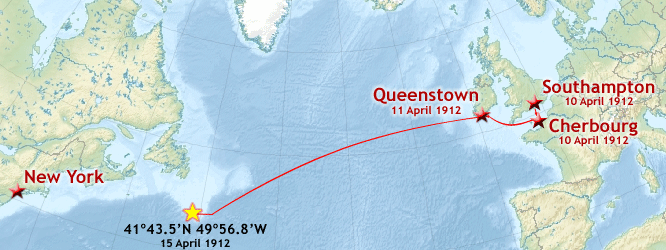

In [62]:
# Description of the columns in the dataset
# PassengerId: Unique ID of the passenger
# Survived: Survival status of the passenger (0 = No, 1 = Yes)
# Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
# Name: Name of the passenger
# Sex: Gender of the passenger
# Age: Age of the passenger
# SibSp: Number of sibling and spouse of the passenger eg: My Family: 1 Brother(sibling) and 1 Wife(spouse) = 1+1 = 2
# Parch: Number of parents and children of the passenger. eg: My Family: 1 Father(parent), 1 Mother(parent) and 2 Children = 1+1+2 = 4
# Ticket: Ticket number of the passenger
# Fare: Fare of the passenger
# Cabin: Cabin number of the passenger
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [63]:
# Exploratory Data Analysis
# What is EDA?
# EDA is a process of performing initial investigations on data so as to discover patterns, to spot anomalies, 
# to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [64]:
df.Survived.value_counts()
# Insight: Most of the passengers travelling in the Titanic did not survive.

Survived
0    549
1    342
Name: count, dtype: int64

In [65]:
df.Survived.value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
# Lets find out the missing values in the dataset in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
# Lets find out the missing values in the dataset in each column
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

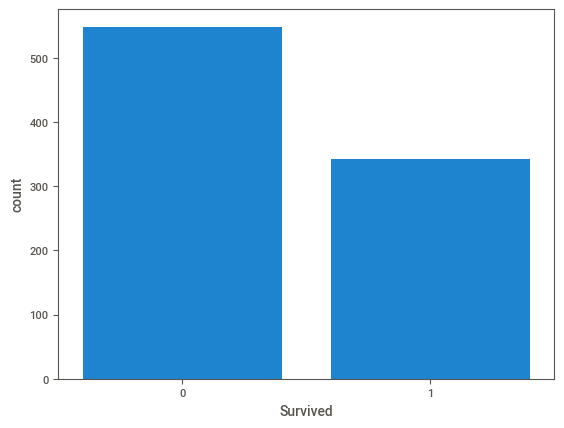

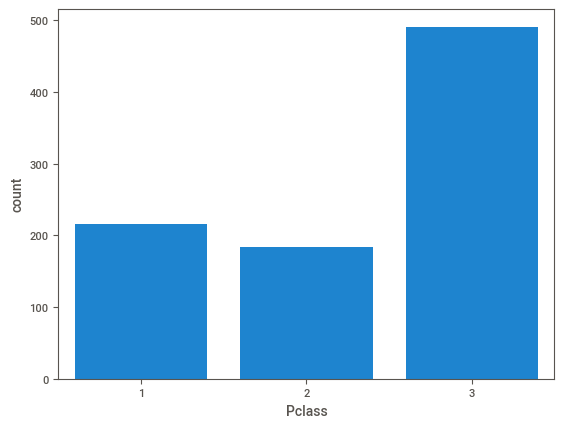

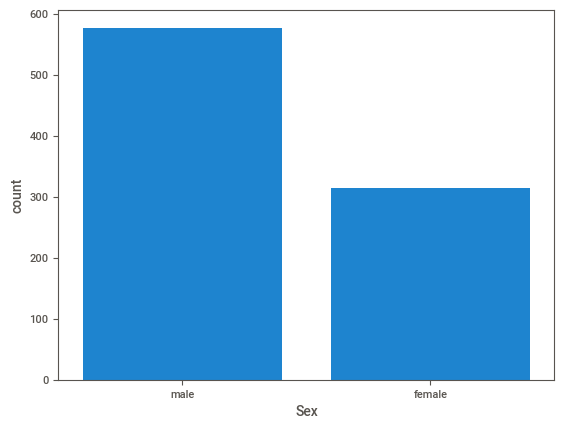

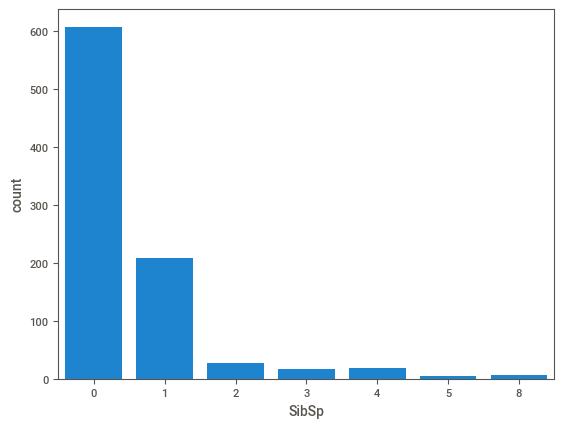

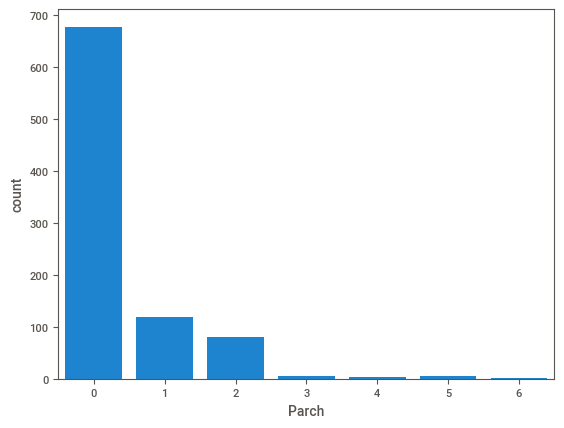

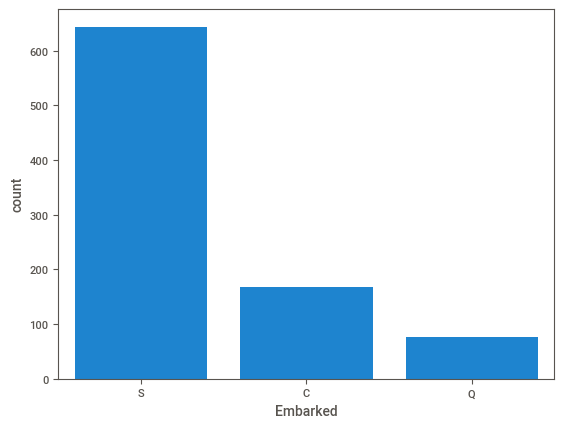

In [69]:
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

In [70]:
# df.select_dtypes(include='object').head()

In [71]:
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
for col in cat_cols:
    print(df[col].value_counts())
    print("="*70)

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [72]:
# # sweetviz library
# # It is an open-source Python library that generates beautiful, high-density visualizations to kickstart 
# # EDA (Exploratory Data Analysis) with just two lines of code.
# # !pip install sweetviz
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html('titanic_report.html')

In [73]:
!pip install sweetviz -q

5407.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [74]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('titanic_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report titanic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [75]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [76]:
df.shape

(891, 12)

In [77]:
(687/891) * 100

77.10437710437711

In [78]:
# Since the missing values in the Cabin column is 77% of the total data, we can drop the column.
# Cabin column is not useful for our analysis because it has a lot of missing values.
# Rule of thumb: If more than 40% of the data is missing, it is better to drop the column or consider imputing the missing values.

df.drop(['Cabin'], axis=1, inplace=True)

df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [79]:
df.Embarked.value_counts()
# Insight: Most of the passengers embarked from Southampton.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [80]:
# Since most of the passengers embarked from Southampton, we can impute the missing values in the Embarked column with the mode value.
df.Embarked.fillna("S", inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

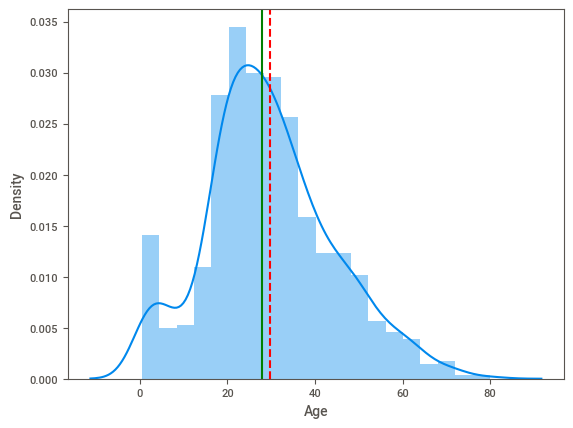

In [81]:
# Age column is numerical in nature.
# If a numerical column has missing values, we can impute the missing values with the mean or median of the column.
# If the column is Normally distributed, we can impute the missing values with the mean of the column.
# If the column is Skewed, we can impute the missing values with the median of the column.

sns.distplot(df.Age) # plot the distribution of the Age column
plt.axvline(df.Age.mean(), color='red', label='Mean', linestyle='--')
plt.axvline(df.Age.median(), color='green', label='Median', linestyle='-')
plt.show()

In [82]:
df.Age.skew()

0.38910778230082704

In [83]:
# If this value is between:
# -0.5 and 0.5, the distribution of the value is almost symmetrical
# -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate.
# If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.

# Lets fill the missing values in the Age column with the mean value
df.Age.fillna(df.Age.mean(), inplace=True)

df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
# Our dataset is now clean and we can proceed with the next steps.

In [85]:
# Lets go for Feature Engineering
# What is Feature Engineering?
# Feature - Column, Engineering - Creating
# Feature engineering is the process of using domain knowledge to extract new and more meaningful features from the existing features in the dataset.
# eg: If I have a column called Date of Birth, I can extract the Year, Month, Day, Quarter, etc from the Date of Birth column.
# eg: If I have a column called Address, I can extract the City, State, Country, etc from the Address column.
# eg: If I have a column called Full Name, I can extract the Title (Mr, Mrs, Miss, etc) from the Name column.
# eg: If I have a column called Date of Joining, I can extract the Year of Joining, Month of Joining, etc from the Date of Joining column.
# eg: If I have a column Height and Weight, I can create a new column called BMI (Body Mass Index) by using the formula: BMI = Weight / (Height * Height)
# eg: If I know your Basic Salary, HRA, DA, TA, etc, I can create a new column called Gross Salary by adding all the components.

In [86]:
# FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df.Parch + 1
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            373450   8.0500        S           1

In [87]:
# isAlone = 1 if FamilySize == 1 else 0
df['isAlone'] = df.FamilySize.apply(lambda x: 1 if x == 1 else 0)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  isAlone  
0      0         A/5 21171   7.2500        S           2        0  
1      0          PC 17599  71.2833        C           2        0  
2      0  STON/O2. 3101282   7.9250        S           1        1  
3      0            113803  53.1000        S           2        0  
4      0            373450   8.0500        S           1        1

In [88]:
df.isAlone.value_counts()
# Insight: Most of the passengers were not alone.

isAlone
1    537
0    354
Name: count, dtype: int64

In [89]:
# How many passengers were travelling free of cost?
df[df.Fare == 0]

PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robert J  male   
806          807         0       1            Andrews, Mr. Thomas Jr  male   
815          816         0       1                  Fry, Mr. Richard  male   
822          823         0       1   Reuchlin, Jonkheer. John George  male   

           Age  SibSp  Parch  Ticket  Fare Embarked  FamilySize  isAlone  
179  36.000000      0      0    LINE   0.0        S           1        1  
263  40.000000      0      0  112059   0.0        S           1        1  
271  25.000000      0      0    LINE   0.0        S           1        1  
277  29.699118      0      0  239853   0.0        S           1        1  
302  19.000000      0      0    LINE   0.0        S           1        1  
413  29.699118      0      0  239853   0.0        S           1        1  
466  29.699118      0      0  239853   0.0        S           1        1  
481  29.699118      0      0  239854   0.0        S           1        1  
597  49.000000      0      0    LINE   0.0        S           1        1  
633  29.699118      0      0  112052   0.0        S           1        1  
674  29.699118      0      0  239856   0.0        S           1        1  
732  29.699118      0      0  239855   0.0        S           1        1  
806  39.000000      0      0  112050   0.0        S           1        1  
815  29.699118      0      0  112058   0.0        S           1        1  
822  38.000000      0      0   19972   0.0        S           1        1

When dealing with missing values in categorical columns during a machine learning problem, there are several strategies you can use to handle them effectively. Here are the key strategies:

### **1. Mode Imputation (Most Frequent Category)**
   - **Description:** Replace missing values with the most frequently occurring category in the column.
   - **Pros:** Simple, quick, and preserves the most common category.
   - **Cons:** Can introduce bias if the most frequent category dominates.

   **Example in Python:**
   ```python
   from sklearn.impute import SimpleImputer
   import pandas as pd

   df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', None, 'A', 'B', None]})
   imputer = SimpleImputer(strategy='most_frequent')
   df['Category'] = imputer.fit_transform(df[['Category']])
   ```

---

### **2. Imputation with a New Category ("Unknown" or "Missing")**
   - **Description:** Replace missing values with a new label like "Unknown", "Missing", or "Other".
   - **Pros:** Allows the model to differentiate missing values rather than guessing.
   - **Cons:** Can introduce noise if missing values have a meaningful pattern.

   **Example in Python:**
   ```python
   df['Category'].fillna('Unknown', inplace=True)
   ```

---

### **3. Imputation Using the Next Most Frequent Category**
   - **Description:** If the mode is too dominant, use the second most frequent category for missing values.
   - **Pros:** Reduces the effect of one category dominating the dataset.
   - **Cons:** Might not be the best choice if the missing values are not random.

   **Example in Python:**
   ```python
   top_two = df['Category'].value_counts().index[:2]  # Get the top two categories
   second_most_frequent = top_two[1] if len(top_two) > 1 else top_two[0]
   df['Category'].fillna(second_most_frequent, inplace=True)
   ```

---

### **4. Imputation Using a Predictive Model (ML-Based Imputation)**
   - **Description:** Use another machine learning model (e.g., Decision Tree, k-NN) to predict missing values based on other features.
   - **Pros:** More accurate and captures patterns from data.
   - **Cons:** Computationally expensive and may introduce bias if the model overfits.

   **Example using k-NN imputer:**
   ```python
   from sklearn.impute import KNNImputer
   from sklearn.preprocessing import LabelEncoder

   df['Category'] = LabelEncoder().fit_transform(df['Category'].astype(str))  # Convert to numeric
   imputer = KNNImputer(n_neighbors=3)
   df['Category'] = imputer.fit_transform(df[['Category']])
   ```

---

### **5. Imputation Based on Business Rules or Domain Knowledge**
   - **Description:** Use domain expertise to determine the best replacement category.
   - **Example:** In a medical dataset, missing values in "Smoker" might be imputed based on "Age" and "Medical History".
   - **Pros:** Can improve model accuracy if domain insights are applied.
   - **Cons:** Requires expertise and data analysis.

---

### **6. Imputation Using Grouped Mode (Category-Based Imputation)**
   - **Description:** Replace missing values based on the most frequent value within a related group.
   - **Example:** If "City" is missing, use the most common city for that "Country".
   - **Pros:** Maintains context within data.
   - **Cons:** Requires additional computation.

   **Example in Python:**
   ```python
   df['Category'] = df.groupby('AnotherColumn')['Category'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
   ```

---

### **7. Encoding Missing Values as a Separate Category**
   - **Description:** Instead of filling in values, treat missing values as a separate category.
   - **Example:** Convert NaNs into "Missing" before encoding.
   - **Pros:** Keeps missingness as a useful feature.
   - **Cons:** Only works well when missingness itself is informative.

   **Example in Python:**
   ```python
   df['Category'] = df['Category'].astype(str).replace('nan', 'Missing')
   ```

---

### **8. Using Probabilistic Imputation (Bayesian Approach)**
   - **Description:** Fill missing values based on probability distribution from existing data.
   - **Example:** If "Color" has a 60% chance of being "Red" and 40% "Blue", fill in missing values accordingly.
   - **Pros:** More robust than simply choosing the most frequent value.
   - **Cons:** Computationally complex.

   **Example using Pandas:**
   ```python
   import numpy as np

   probs = df['Category'].value_counts(normalize=True)
   df['Category'] = df['Category'].apply(lambda x: np.random.choice(probs.index, p=probs.values) if pd.isnull(x) else x)
   ```

---

### **Which Strategy Should You Use?**
| **Scenario** | **Best Imputation Method** |
|-------------|----------------------------|
| Few missing values | Mode imputation |
| Large missing values | "Unknown" category |
| Relationship with other features | Predictive model |
| Domain-specific data | Business rule-based imputation |
| Missing values are meaningful | Treat as a separate category |
| Structured data with groups | Group-based mode imputation |
| Probabilistic nature | Bayesian or probabilistic imputation |

Each approach has its advantages and drawbacks, and the best method depends on the dataset and the problem at hand. You can also try multiple methods and evaluate which works best for your specific machine learning model. 🚀

When dealing with missing values in numerical columns in a machine learning problem, several strategies can be employed depending on the nature of the data and the missingness pattern. Below are the key imputation strategies:

---

### **1. Mean Imputation (Replacing with the Mean)**
   - **Description:** Replace missing values with the mean of the available values in the column.
   - **Best for:** Normally distributed data without extreme outliers.
   - **Pros:** Simple and effective for many datasets.
   - **Cons:** Can be affected by outliers, leading to biased imputation.

   **Example in Python:**
   ```python
   from sklearn.impute import SimpleImputer
   import pandas as pd

   df = pd.DataFrame({'Value': [10, 20, None, 30, 40, None, 50]})
   imputer = SimpleImputer(strategy='mean')
   df['Value'] = imputer.fit_transform(df[['Value']])
   ```

---

### **2. Median Imputation (Replacing with the Median)**
   - **Description:** Replace missing values with the median of the column.
   - **Best for:** Skewed data or when outliers are present.
   - **Pros:** Robust against outliers.
   - **Cons:** May not capture the distribution as well as mean imputation.

   **Example in Python:**
   ```python
   imputer = SimpleImputer(strategy='median')
   df['Value'] = imputer.fit_transform(df[['Value']])
   ```

---

### **3. Mode Imputation (Replacing with the Most Frequent Value)**
   - **Description:** Replace missing values with the most frequently occurring value in the column.
   - **Best for:** Discrete numerical features (e.g., age in customer data).
   - **Pros:** Works well when values repeat frequently.
   - **Cons:** May introduce bias if one value is too dominant.

   **Example in Python:**
   ```python
   imputer = SimpleImputer(strategy='most_frequent')
   df['Value'] = imputer.fit_transform(df[['Value']])
   ```

---

### **4. Constant Value Imputation (Replacing with a Specific Value)**
   - **Description:** Replace missing values with a fixed number (e.g., 0, -1, or an arbitrary number).
   - **Best for:** Cases where missing values have special meaning (e.g., missing income = unemployed).
   - **Pros:** Useful for distinguishing missing values as a separate category.
   - **Cons:** Can distort distributions if not chosen carefully.

   **Example in Python:**
   ```python
   imputer = SimpleImputer(strategy='constant', fill_value=0)
   df['Value'] = imputer.fit_transform(df[['Value']])
   ```

---

### **5. Interpolation (Filling Using Trends)**
   - **Description:** Replace missing values by estimating them from surrounding values (e.g., linear, polynomial, or spline interpolation).
   - **Best for:** Time-series data or numerical sequences.
   - **Pros:** Preserves trends in the data.
   - **Cons:** Can introduce errors if data is noisy.

   **Example in Python:**
   ```python
   df['Value'] = df['Value'].interpolate(method='linear')
   ```

---

### **6. K-Nearest Neighbors (KNN) Imputation**
   - **Description:** Replace missing values using the mean (or weighted mean) of the k-nearest neighbors.
   - **Best for:** Datasets with strong correlations between features.
   - **Pros:** Captures relationships between variables.
   - **Cons:** Computationally expensive for large datasets.

   **Example in Python:**
   ```python
   from sklearn.impute import KNNImputer

   imputer = KNNImputer(n_neighbors=5)
   df['Value'] = imputer.fit_transform(df[['Value']])
   ```

---

### **7. Regression-Based Imputation (Predictive Model)**
   - **Description:** Use a regression model to predict missing values based on other features.
   - **Best for:** When missing values depend on other variables.
   - **Pros:** More accurate than simple imputation.
   - **Cons:** Computationally expensive and can introduce bias.

   **Example in Python:**
   ```python
   from sklearn.linear_model import LinearRegression

   # Assume df has another column 'Feature' that can predict 'Value'
   train = df.dropna()
   test = df[df['Value'].isna()]

   model = LinearRegression()
   model.fit(train[['Feature']], train['Value'])
   df.loc[df['Value'].isna(), 'Value'] = model.predict(test[['Feature']])
   ```

---

### **8. Grouped Mean/Median Imputation**
   - **Description:** Fill missing values based on group-wise mean or median.
   - **Best for:** When data has categorical grouping (e.g., missing income within each profession group).
   - **Pros:** Preserves group-based patterns.
   - **Cons:** Requires sufficient data within each group.

   **Example in Python:**
   ```python
   df['Value'] = df.groupby('Category')['Value'].transform(lambda x: x.fillna(x.median()))
   ```

---

### **9. Multiple Imputation (MICE - Multivariate Imputation by Chained Equations)**
   - **Description:** Iteratively fills missing values by modeling each variable conditionally on the others.
   - **Best for:** Datasets with multiple missing values across different columns.
   - **Pros:** More robust than single imputations.
   - **Cons:** Computationally intensive.

   **Example in Python:**
   ```python
   from sklearn.experimental import enable_iterative_imputer
   from sklearn.impute import IterativeImputer

   imputer = IterativeImputer()
   df[['Value']] = imputer.fit_transform(df[['Value']])
   ```

---

### **10. Dropping Missing Values**
   - **Description:** Remove rows or columns with missing values.
   - **Best for:** When the percentage of missing values is small (e.g., <5% of the dataset).
   - **Pros:** Simple and prevents introducing imputation errors.
   - **Cons:** Can lead to loss of valuable data.

   **Example in Python:**
   ```python
   df.dropna(subset=['Value'], inplace=True)
   ```

---

### **Choosing the Right Strategy**
| **Scenario** | **Best Imputation Strategy** |
|-------------|----------------------------|
| Few missing values | Mean, median, or mode imputation |
| Outliers present | Median imputation |
| Data has a trend | Interpolation |
| Strong feature correlation | KNN or regression-based imputation |
| Categorical groups present | Group-wise mean/median imputation |
| Large missing values | Multiple Imputation (MICE) |
| Missing values have meaning | Constant value imputation |
| Data is too sparse | Dropping missing values |

Each strategy has its pros and cons, and the best choice depends on the dataset characteristics and the domain knowledge available. Experimenting with different imputation methods and evaluating their impact on model performance is often the best approach. 🚀

In [90]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  isAlone  
0      0         A/5 21171   7.2500        S           2        0  
1      0          PC 17599  71.2833        C           2        0  
2      0  STON/O2. 3101282   7.9250        S           1        1  
3      0            113803  53.1000        S           2        0  
4      0            373450   8.0500        S           1        1

In [91]:
"Braund, Mr. Owen Harris".split(',')[1].split('.')[0].strip()

'Mr'

In [92]:
"Futrelle, Mrs. Jacques Heath (Lily May Peel)".split(',')[1].split('.')[0].strip()

'Mrs'

In [93]:
"Allen, Mr. William Henry".split(',')[1].split('.')[0].strip()

'Mr'

In [94]:
# Lets extract the Title from the Name column
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  isAlone Title  
0      0         A/5 21171   7.2500        S           2        0    Mr  
1      0          PC 17599  71.2833        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1        1  Miss  
3      0            113803  53.1000        S           2        0   Mrs  
4      0            373450   8.0500        S           1        1    Mr

In [95]:
df.Title.value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [96]:
# Define the mapping dictionary to merge rare titles into existing ones
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Mr",          # Merge into "Mr"
    "Rev": "Mr",
    "Major": "Mr",
    "Col": "Mr",
    "Capt": "Mr",
    "Sir": "Mr",
    "Don": "Mr",
    "Jonkheer": "Mr",
    "Ms": "Miss",        # Merge into "Miss"
    "Mlle": "Miss",
    "Lady": "Miss",
    "the Countess": "Mrs",  # More suitable to "Mrs"
    "Mme": "Mrs"
}

# Replace titles in the DataFrame
df["Title"] = df["Title"].replace(title_mapping)

# Verify the new title counts
print(df.Title.value_counts())


Title
Mr        538
Miss      186
Mrs       127
Master     40
Name: count, dtype: int64


In [97]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  isAlone Title  
0      0         A/5 21171   7.2500        S           2        0    Mr  
1      0          PC 17599  71.2833        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1        1  Miss  
3      0            113803  53.1000        S           2        0   Mrs  
4      0            373450   8.0500        S           1        1    Mr

In [98]:
df.Survived.value_counts()
# Insight: Most of the passengers travelling in the Titanic did not survive.

Survived
0    549
1    342
Name: count, dtype: int64

In [99]:
# Find the survival rate of passengers based on the Pclass
df.groupby(["Pclass"])["Survived"].mean()
# Insight: Passengers travelling in the 1st class had a higher survival rate compared to the 2nd and 3rd class passengers.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [100]:
# Find the survival rate of passengers based on the Sex
df.groupby(["Sex"])["Survived"].mean()
# Insight: Females had a higher survival rate compared to Males.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [101]:
# Find the survival rate of passengers based on the Title
df.groupby(["Title"])["Survived"].mean()
# Insight: 

Title
Master    0.575000
Miss      0.704301
Mr        0.161710
Mrs       0.795276
Name: Survived, dtype: float64

In [102]:
# Find the survival rate of passengers based on the Embarked
df.groupby(["Embarked"])["Survived"].mean()
# Insight: 

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [103]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  isAlone Title  
0      0         A/5 21171   7.2500        S           2        0    Mr  
1      0          PC 17599  71.2833        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1        1  Miss  
3      0            113803  53.1000        S           2        0   Mrs  
4      0            373450   8.0500        S           1        1    Mr

In [104]:
# GenderClass
# If Age < 15, GenderClass = child
# Else, GenderClass = Sex (male/female)

df['GenderClass'] = df.apply(lambda dff: 'child' if dff['Age'] < 15 else dff["Sex"], axis=1)
df.GenderClass.value_counts()

GenderClass
male      538
female    275
child      78
Name: count, dtype: int64

In [105]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  isAlone Title  \
0      0         A/5 21171   7.2500        S           2        0    Mr   
1      0          PC 17599  71.2833        C           2        0   Mrs   
2      0  STON/O2. 3101282   7.9250        S           1        1  Miss   
3      0            113803  53.1000        S           2        0   Mrs   
4      0            373450   8.0500        S           1        1    Mr   

  GenderClass  
0        male  
1      female  
2      female  
3      female  
4        male

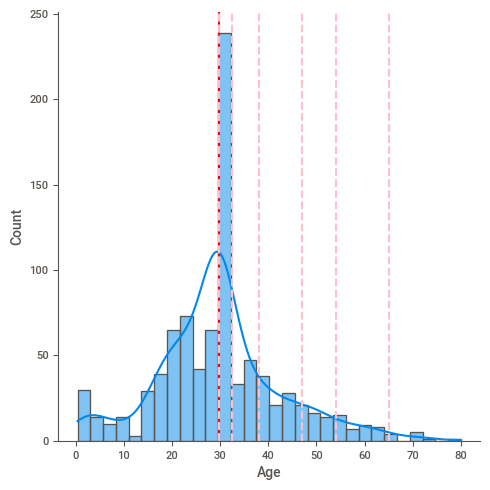

In [106]:
sns.displot(df.Age, kde=True)
plt.axvline(df.Age.mean(), color='red', label='Mean', linestyle='-')
plt.axvline(df.Age.quantile(0.5), color='pink', linestyle='--')
plt.axvline(df.Age.quantile(0.6), color='pink', linestyle='--')
plt.axvline(df.Age.quantile(0.7), color='pink', linestyle='--')
plt.axvline(df.Age.quantile(0.8), color='pink', linestyle='--')
plt.axvline(df.Age.quantile(0.9), color='pink', linestyle='--')
plt.axvline(df.Age.quantile(0.95), color='pink', linestyle='--')
plt.axvline(df.Age.quantile(0.99), color='pink', linestyle='--')
plt.show()

In [107]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'isAlone', 'Title',
       'GenderClass'],
      dtype='object')

In [108]:
# Aim of the Project: Predict the survival of passengers on the Titanic based on the features provided in the dataset.
# Now, lets try to figure out which columns are useful for our analysis and which columns are not useful.
unnecessary_columns = ['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket']
df.drop(unnecessary_columns, axis=1, inplace=True)
df.head()

Survived  Pclass   Age     Fare Embarked  FamilySize  isAlone Title  \
0         0       3  22.0   7.2500        S           2        0    Mr   
1         1       1  38.0  71.2833        C           2        0   Mrs   
2         1       3  26.0   7.9250        S           1        1  Miss   
3         1       1  35.0  53.1000        S           2        0   Mrs   
4         0       3  35.0   8.0500        S           1        1    Mr   

  GenderClass  
0        male  
1      female  
2      female  
3      female  
4        male

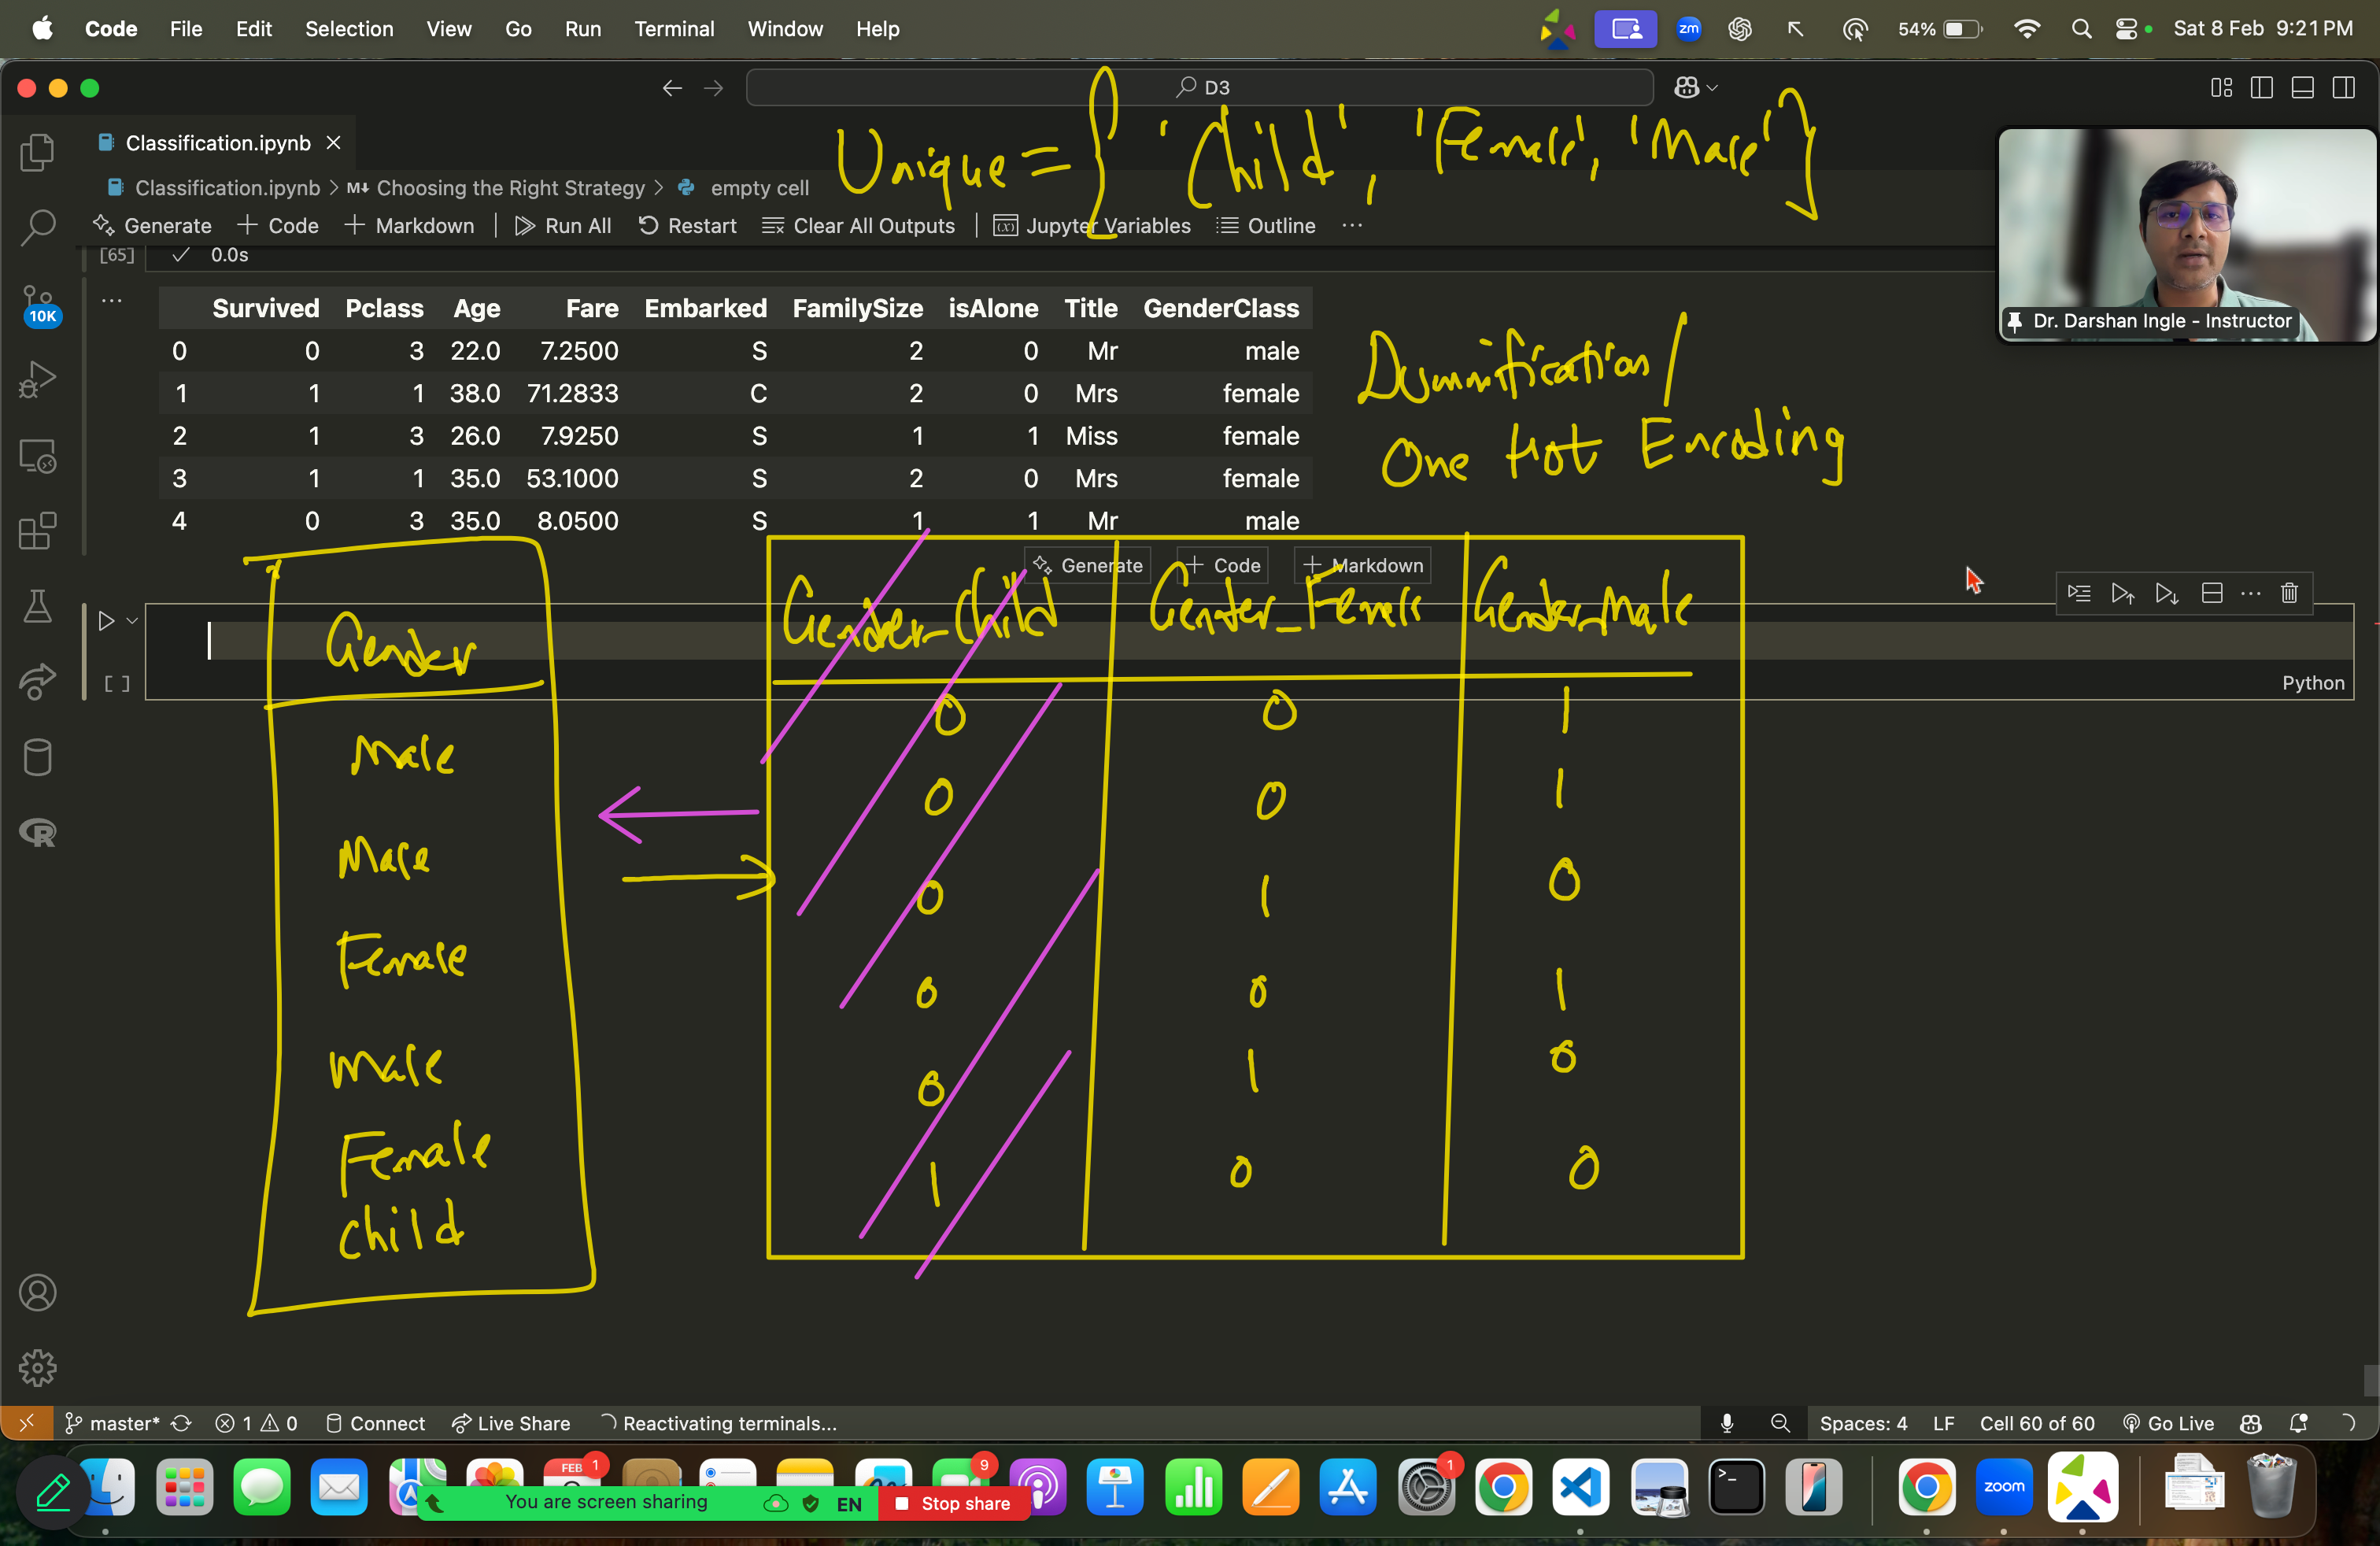

In [109]:
df.dtypes

Survived         int64
Pclass           int64
Age            float64
Fare           float64
Embarked        object
FamilySize       int64
isAlone          int64
Title           object
GenderClass     object
dtype: object

In [55]:
# Dummification / One-Hot Encoding - pd.get_dummies()

columns_to_dummify = ['Embarked', 'Title', 'GenderClass']
df = pd.get_dummies(df, columns=columns_to_dummify, drop_first=True, dtype=int)
df.head()

Survived  Pclass   Age     Fare  FamilySize  isAlone  Embarked_Q  \
0         0       3  22.0   7.2500           2        0           0   
1         1       1  38.0  71.2833           2        0           0   
2         1       3  26.0   7.9250           1        1           0   
3         1       1  35.0  53.1000           2        0           0   
4         0       3  35.0   8.0500           1        1           0   

   Embarked_S  Title_Miss  Title_Mr  Title_Mrs  GenderClass_female  \
0           1           0         1          0                   0   
1           0           0         0          1                   1   
2           1           1         0          0                   1   
3           1           0         0          1                   1   
4           1           0         1          0                   0   

   GenderClass_male  
0                 1  
1                 0  
2                 0  
3                 0  
4                 1

In [56]:
df.dtypes

Survived                int64
Pclass                  int64
Age                   float64
Fare                  float64
FamilySize              int64
isAlone                 int64
Embarked_Q              int64
Embarked_S              int64
Title_Miss              int64
Title_Mr                int64
Title_Mrs               int64
GenderClass_female      int64
GenderClass_male        int64
dtype: object

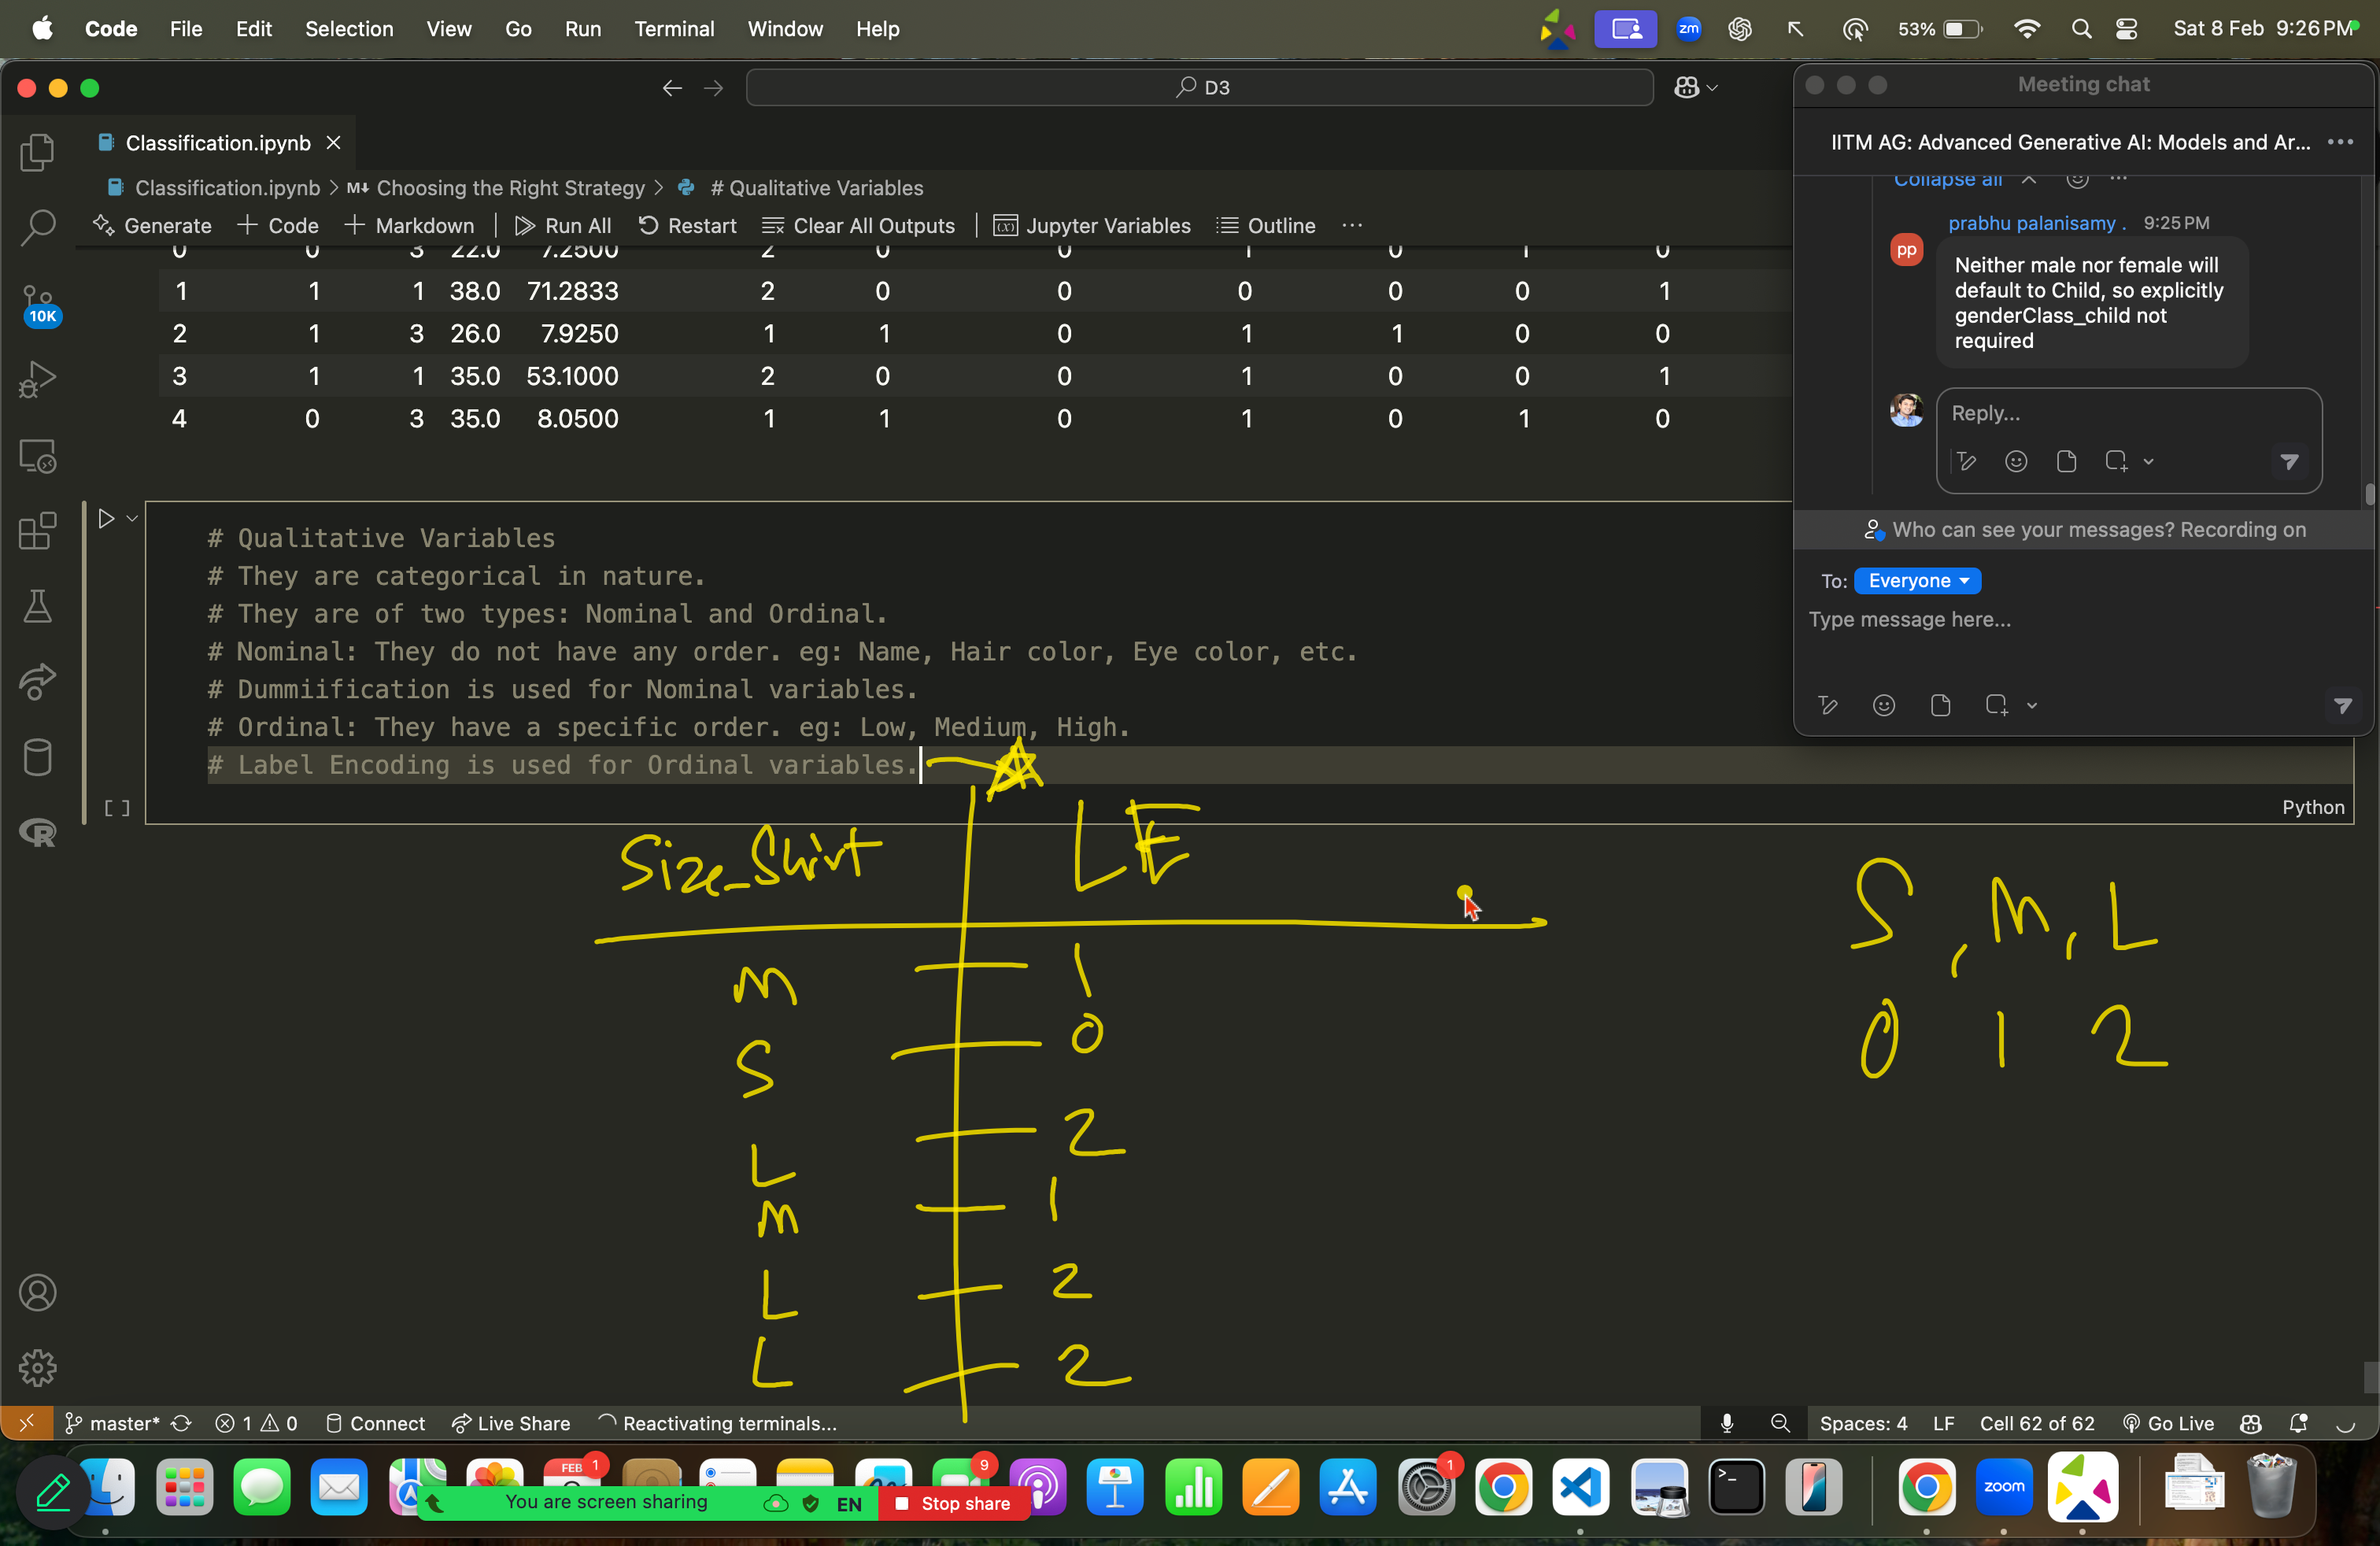

In [53]:
# Qualitative Variables
# They are categorical in nature.
# They are of two types: Nominal and Ordinal.
# Nominal: They do not have any order. eg: Name, Hair color, Eye color, etc.
# Dummiification is used for Nominal variables.
# Ordinal: They have a specific order. eg: Low, Medium, High.
# Label Encoding is used for Ordinal variables.

In [54]:
df.head()

Survived  Pclass   Age     Fare  FamilySize  isAlone  Embarked_Q  \
0         0       3  22.0   7.2500           2        0           0   
1         1       1  38.0  71.2833           2        0           0   
2         1       3  26.0   7.9250           1        1           0   
3         1       1  35.0  53.1000           2        0           0   
4         0       3  35.0   8.0500           1        1           0   

   Embarked_S  Title_Miss  Title_Mr  Title_Mrs  GenderClass_female  \
0           1           0         1          0                   0   
1           0           0         0          1                   1   
2           1           1         0          0                   1   
3           1           0         0          1                   1   
4           1           0         1          0                   0   

   GenderClass_male  
0                 1  
1                 0  
2                 0  
3                 0  
4                 1

In [55]:
# Split the dataset into Independent and Dependent variables
# X = All the columns except the 'Survived' column
X = df.drop(['Survived'], axis=1)
# y = 'Survived' column
y = df['Survived']

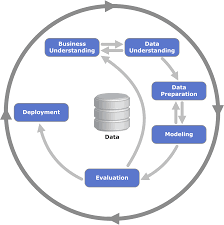

In [56]:
# Split the dataset into Training and Testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
# Shape of X_train, X_test, y_train, y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 12) (179, 12) (712,) (179,)


In [57]:
X_train.head()

Pclass   Age     Fare  FamilySize  isAlone  Embarked_Q  Embarked_S  \
331       1  45.5  28.5000           1        1           0           1   
733       2  23.0  13.0000           1        1           0           1   
382       3  32.0   7.9250           1        1           0           1   
704       3  26.0   7.8542           2        0           0           1   
813       3   6.0  31.2750           7        0           0           1   

     Title_Miss  Title_Mr  Title_Mrs  GenderClass_female  GenderClass_male  
331           0         1          0                   0                 1  
733           0         1          0                   0                 1  
382           0         1          0                   0                 1  
704           0         1          0                   0                 1  
813           1         0          0                   0                 0

In [58]:
# Scaling the data
columns_to_be_scaled = ['Age', 'Fare']
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[columns_to_be_scaled] = ss.fit_transform(X_train[columns_to_be_scaled])
X_test[columns_to_be_scaled] = ss.transform(X_test[columns_to_be_scaled])

In [59]:
# Classification Algorithms available in Machine Learning
# 1. Logistic Regression
# 2. K-Nearest Neighbors (KNN)
# 3. Support Vector Machine (SVM)
# 4. Decision Tree Classifier
# 5. Random Forest Classifier
# 6. Gradient Boosting Classifier
# 7. AdaBoost Classifier
# 8. CatBoost Classifier
# 9. LightGBM Classifier
# 10. XGBoost Classifier
# 11. Naive Bayes Classifier
# 12. Extra Trees Classifier

In [60]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy: ", acc_train)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  0.8398876404494382
Testing Accuracy:  0.8044692737430168


In [62]:
# Create a dataframe to store the Train and Test Accuracy of all the models

acc_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', "Difference"])
acc_df

Empty DataFrame
Columns: [Model, Train Accuracy, Test Accuracy, Difference]
Index: []

In [63]:
# Append the values of the Logistic Regression model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})

acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0  Logistic Regression        0.839888       0.804469    0.035418

In [64]:
# What is a good model?
# A good model is the one which satisfies both of the following conditions:
# 1. Testing Accuracy >= 80%
# 2. (Training Accuracy - Testing Accuracy) <= 5%

In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy: ", acc_train)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  0.8300561797752809
Testing Accuracy:  0.7988826815642458


In [66]:
# Append the values of the Logistic Regression model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['Logistic Regression'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})

acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0  Logistic Regression        0.839888       0.804469    0.035418
1  Logistic Regression        0.830056       0.798883    0.031173

In [67]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the Decision Tree Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['Decision Tree Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561

In [68]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the Decision Tree Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['Decision Tree Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263

In [69]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the Support Vector Machine model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['Support Vector Machine'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263
4    Support Vector Machine        0.839888       0.815642    0.024245

In [70]:
!pip install catboost -q

In [71]:
# CatBoost Classifier
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
y_pred_train = cbc.predict(X_train)
y_pred_test = cbc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the CatBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['CatBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Learning rate set to 0.008911
0:	learn: 0.6867650	total: 56.1ms	remaining: 56.1s
1:	learn: 0.6805586	total: 57.3ms	remaining: 28.6s
2:	learn: 0.6743928	total: 58ms	remaining: 19.3s
3:	learn: 0.6678503	total: 58.5ms	remaining: 14.6s
4:	learn: 0.6615569	total: 59ms	remaining: 11.8s
5:	learn: 0.6561797	total: 59.7ms	remaining: 9.89s
6:	learn: 0.6510047	total: 60.1ms	remaining: 8.52s
7:	learn: 0.6450629	total: 60.6ms	remaining: 7.52s
8:	learn: 0.6394873	total: 61.3ms	remaining: 6.74s
9:	learn: 0.6354679	total: 61.8ms	remaining: 6.12s
10:	learn: 0.6300716	total: 62.3ms	remaining: 5.6s
11:	learn: 0.6250313	total: 62.7ms	remaining: 5.17s
12:	learn: 0.6199734	total: 63.2ms	remaining: 4.8s
13:	learn: 0.6147979	total: 63.7ms	remaining: 4.49s
14:	learn: 0.6099881	total: 64.2ms	remaining: 4.21s
15:	learn: 0.6057921	total: 64.7ms	remaining: 3.98s
16:	learn: 0.6009607	total: 65.3ms	remaining: 3.78s
17:	learn: 0.5967798	total: 65.9ms	remaining: 3.6s
18:	learn: 0.5921724	total: 66.4ms	remaining: 3.43s

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263
4    Support Vector Machine        0.839888       0.815642    0.024245
5       CatBoost Classifier        0.898876       0.810056    0.088821

In [72]:
# CatBoost Classifier
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=5, verbose=0)
cbc.fit(X_train, y_train)
y_pred_train = cbc.predict(X_train)
y_pred_test = cbc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the CatBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['CatBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263
4    Support Vector Machine        0.839888       0.815642    0.024245
5       CatBoost Classifier        0.898876       0.810056    0.088821
6       CatBoost Classifier        0.980337       0.810056    0.170281

In [73]:
# CatBoost Classifier
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=5, verbose=0)
cbc.fit(X_train, y_train)
y_pred_train = cbc.predict(X_train)
y_pred_test = cbc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the CatBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['CatBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263
4    Support Vector Machine        0.839888       0.815642    0.024245
5       CatBoost Classifier        0.898876       0.810056    0.088821
6       CatBoost Classifier        0.980337       0.810056    0.170281
7       CatBoost Classifier        0.893258       0.821229    0.072029

In [74]:
# CatBoost Classifier
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=1000, learning_rate=0.001, depth=5, verbose=0)
cbc.fit(X_train, y_train)
y_pred_train = cbc.predict(X_train)
y_pred_test = cbc.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the CatBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['CatBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263
4    Support Vector Machine        0.839888       0.815642    0.024245
5       CatBoost Classifier        0.898876       0.810056    0.088821
6       CatBoost Classifier        0.980337       0.810056    0.170281
7       CatBoost Classifier        0.893258       0.821229    0.072029
8       CatBoost Classifier        0.838483       0.815642    0.022841

In [75]:
!pip install lightgbm -q

In [76]:
# LightGBM Classifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_train = lgbm.predict(X_train)
y_pred_test = lgbm.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the LightGBM Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['LightGBM Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model  Train Accuracy  Test Accuracy  Difference
0       Logistic Regression        0.839888       0.804469    0.035418
1       Logistic Regression        0.830056       0.798883    0.031173
2  Decision Tree Classifier        0.980337       0.759777    0.220561
3  Decision Tree Classifier        0.858146       0.798883    0.059263
4    Support Vector Machine        0.839888       0.815642    0.024245
5       CatBoost Classifier        0.898876       0.810056    0.088821
6       CatBoost Classifier        0.980337       0.810056    0.170281
7       CatBoost Classifier        0.893258       0.821229    0.072029
8       CatBoost Classifier        0.838483       0.815642    0.022841
9       LightGBM Classifier        0.950843       0.826816    0.124027

In [77]:
!pip install xgboost -q

In [78]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823

In [79]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823
11        XGBoost Classifier        0.924157       0.810056    0.114101

In [80]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=5)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823
11        XGBoost Classifier        0.924157       0.810056    0.114101
12        XGBoost Classifier        0.917135       0.815642    0.101492

In [81]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=6)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823
11        XGBoost Classifier        0.924157       0.810056    0.114101
12        XGBoost Classifier        0.917135       0.815642    0.101492
13        XGBoost Classifier        0.924157       0.810056    0.114101

In [82]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=4)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823
11        XGBoost Classifier        0.924157       0.810056    0.114101
12        XGBoost Classifier        0.917135       0.815642    0.101492
13        XGBoost Classifier        0.924157       0.810056    0.114101
14        XGBoost Classifier        0.901685       0.815642    0.086043

In [83]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823
11        XGBoost Classifier        0.924157       0.810056    0.114101
12        XGBoost Classifier        0.917135       0.815642    0.101492
13        XGBoost Classifier        0.924157       0.810056    0.114101
14        XGBoost Classifier        0.901685       0.815642    0.086043
15        XGBoost Classifier        0.879213       0.793296    0.085917

In [84]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.0001, n_estimators=1000, max_depth=3)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
# Append the values of the XGBoost Classifier model to the acc_df dataframe
new_row = pd.DataFrame({
    'Model': ['XGBoost Classifier'], 
    'Train Accuracy': [acc_train], 
    'Test Accuracy': [acc_test], 
    'Difference': [acc_train-acc_test]
})
acc_df = pd.concat([acc_df, new_row], ignore_index=True)
acc_df

Model  Train Accuracy  Test Accuracy  Difference
0        Logistic Regression        0.839888       0.804469    0.035418
1        Logistic Regression        0.830056       0.798883    0.031173
2   Decision Tree Classifier        0.980337       0.759777    0.220561
3   Decision Tree Classifier        0.858146       0.798883    0.059263
4     Support Vector Machine        0.839888       0.815642    0.024245
5        CatBoost Classifier        0.898876       0.810056    0.088821
6        CatBoost Classifier        0.980337       0.810056    0.170281
7        CatBoost Classifier        0.893258       0.821229    0.072029
8        CatBoost Classifier        0.838483       0.815642    0.022841
9        LightGBM Classifier        0.950843       0.826816    0.124027
10        XGBoost Classifier        0.966292       0.804469    0.161823
11        XGBoost Classifier        0.924157       0.810056    0.114101
12        XGBoost Classifier        0.917135       0.815642    0.101492
13        XGBoost Classifier        0.924157       0.810056    0.114101
14        XGBoost Classifier        0.901685       0.815642    0.086043
15        XGBoost Classifier        0.879213       0.793296    0.085917
16        XGBoost Classifier        0.623596       0.586592    0.037003

In [85]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

In [86]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

In [87]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy: ", acc_train)
print("Testing Accuracy: ", acc_test)

Training Accuracy:  0.8398876404494382
Testing Accuracy:  0.8044692737430168


In [90]:
# # Save the model
import joblib
joblib.dump(logreg, 'titanic_model.pkl')
joblib.dump(ss, 'titanic_scaler.pkl')
print("Model is saved successfully!")

Model is saved successfully!


In [91]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

In [ ]:
# Final column list: 
# ['Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone', 'Embarked', 'Title', 'GenderClass']

# Happy Learning

In [1]:
import numpy

In [ ]:
# Deployment of the Model - Streamlit
# Deployment is the process of making the model available for the end-users.
# Streamlit is an open-source Python library that makes it easy to create and share web apps for 
# machine learning and data science.

# Installation of Streamlit
# !pip install streamlit -q

# Create a new Python file called app.py
# Open the file in any IDE and write the following code
import streamlit as st
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
Load the model and the scaler
model = joblib.load('titanic_model.pkl')
scaler = joblib.load('titanic_scaler.pkl')
# Streamlit App
st.title('Titanic Survival Prediction App')
st.write('''This app predicts the survival of passengers on the Titanic based on the features provided in the dataset.''')  
# Pclass - 1,2,3
pclass = st.selectbox('Select the Ticket Class', [1, 2, 3])
# Age - 0 to 100
age = st.slider('Select the Age of the Passenger', 0, 100)
# Fare - 0 to 1000
fare = st.slider('Select the Fare of the Passenger', 0, 1000)
# SibSp - 0,1,2,3,4,5,8
sibsp = st.selectbox('Select the Number of Sibling and Spouse', [0, 1, 2, 3, 4, 5, 8])
# Parch - 0,1,2,3,4,5,6
parch = st.selectbox('Select the Number of Parents and Children', [0, 1, 2, 3, 4, 5, 6])
# Embarked - C,Q,S
embarked = st.selectbox('Select the Port of Embarkation', ['C', 'Q', 'S'])
# FamilySize = SibSp + Parch + 1
family_size = sibsp + parch + 1
# isAlone = 1 if FamilySize == 1 else 0
is_alone = 1 if family_size == 1 else 0
# Title - Mr, Miss, Mrs, Master
title = st.selectbox('Select the Title of the Passenger', ['Mr', 'Miss', 'Mrs', 'Master'])
# GenderClass
gender_class = st.selectbox('Select the GenderClass of the Passenger', ['Male', 'Female', 'child'])
# Final column list: 
# ['Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone', 'Embarked', 'Title', 'GenderClass']

# ['Pclass', 'Age', 'Fare', 'FamilySize', 'isAlone', 'Embarked_Q',
#        'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
#        'GenderClass_female', 'GenderClass_male']
# Dummification on Embarked, Title, GenderClass

# Create a DataFrame
data = {
    'Pclass': pclass,
    'Age': age,
    'Fare': fare,
    'FamilySize': family_size,
    'isAlone': is_alone,
    'Embarked': embarked,
    'Title': title,
    'GenderClass': gender_class
}
df = pd.DataFrame(data, index=[0])
# Dummification
columns_to_dummify = ['Embarked', 'Title', 'GenderClass']
df = pd.get_dummies(df, columns=columns_to_dummify, drop_first=True, dtype=int)
# Scaling
columns_to_be_scaled = ['Age', 'Fare']
df[columns_to_be_scaled] = scaler.transform(df[columns_to_be_scaled])
# Prediction
prediction = model.predict(df)
if prediction[0] == 0:
    st.error("The passenger did not survive.")
else:
    st.success("The passenger survived.")
st.write(prediction[0])

In [ ]:
# Factorial code
def factorial(